In [ ]:
zip_path = '/content/drive/My\ Drive/Deep_Learning/cats-dogs.zip'
!cp {zip_path} /content/
!cd /content/
!unzip -q /content/cats-dogs.zip -d /content
!rm /content/cats-dogs.zip

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

## Baseline CNN model

In [ ]:
#Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dataset_dir = '/content/'

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
100/100 [==============================] - 44s 443ms/step - loss: 0.7329 - accuracy: 0.5581 - val_loss: 0.6409 - val_accuracy: 0.6332
Epoch 2/75
100/100 [==============================] - 44s 441ms/step - loss: 0.6630 - accuracy: 0.5778 - val_loss: 0.6726 - val_accuracy: 0.5972
Epoch 3/75
100/100 [==============================] - 43s 434ms/step - loss: 0.6685 - accuracy: 0.6013 - val_loss: 0.6638 - val_accuracy: 0.6288
Epoch 4/75
100/100 [==============================] - 44s 440ms/step - loss: 0.6591 - accuracy: 0.6282 - val_loss: 0.6633 - val_accuracy: 0.6190
Epoch 5/75
100/100 [==============================] - 44s 439ms/step - loss: 0.6562 - accuracy: 0.6241 - val_loss: 0.6657 - val_accuracy: 0.6026
Epoch 6/75
100/100 [==============================] - 44s 437ms/step - loss: 0.6515 - accuracy: 0.6361 - val_loss: 0.6555 - val_accuracy: 0.6266
Epoch 7/75
100/100 [==============================] - 

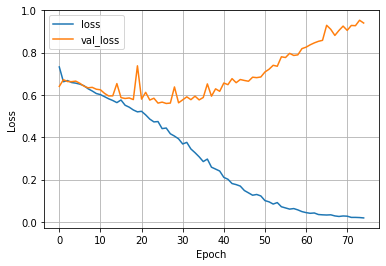

In [ ]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)
plot_loss(history_base_model)

## Augmented

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, zoom_range=[0.5,1.0], brightness_range=[0.2,1.0], rotation_range=90, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_augmented_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_augmented_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


Epoch 1/75
100/100 [==============================] - 148s 1s/step - loss: 0.7455 - accuracy: 0.5384 - val_loss: 0.6514 - val_accuracy: 0.5742
Epoch 2/75
100/100 [==============================] - 147s 1s/step - loss: 0.6604 - accuracy: 0.6008 - val_loss: 0.6349 - val_accuracy: 0.6319
Epoch 3/75
100/100 [==============================] - 146s 1s/step - loss: 0.6524 - accuracy: 0.6144 - val_loss: 0.6447 - val_accuracy: 0.6150
Epoch 4/75
100/100 [==============================] - 147s 1s/step - loss: 0.6367 - accuracy: 0.6310 - val_loss: 0.6273 - val_accuracy: 0.6368
Epoch 5/75
100/100 [==============================] - 146s 1s/step - loss: 0.6315 - accuracy: 0.6374 - val_loss: 0.5984 - val_accuracy: 0.6581
Epoch 6/75
100/100 [==============================] - 147s 1s/step - loss: 0.6263 - accuracy: 0.6493 - val_loss: 0.5762 - val_accuracy: 0.6812
Epoch 7/75
100/100 [==============================] - 146s 1s/step - loss: 0.6201 - accuracy: 0.6477 - val_loss: 0.5943 - val_accuracy: 0.6572

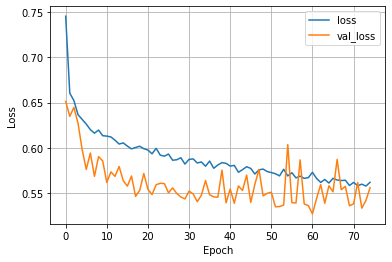

In [ ]:
history_augmented_dataset = model.fit_generator(train_augmented_iterator, steps_per_epoch=len(train_augmented_iterator), validation_data=test_augmented_iterator, validation_steps=len(test_augmented_iterator), epochs=75)
plot_loss(history_augmented_dataset)

## Deeper Model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)            

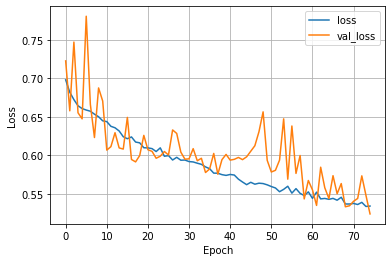

In [ ]:
'''
Deeper CNN
'''
deeper_model = Sequential()

# Convolution layer yang lebih dalam
deeper_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
deeper_model.add(MaxPooling2D((2, 2)))
deeper_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
deeper_model.add(MaxPooling2D((2, 2)))
deeper_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
deeper_model.add(MaxPooling2D((2, 2)))

deeper_model.add(Flatten())

deeper_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
deeper_model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

deeper_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

deeper_model.summary()

history_deeper_model = deeper_model.fit_generator(train_augmented_iterator, steps_per_epoch=len(train_augmented_iterator), validation_data=test_augmented_iterator, validation_steps=len(test_augmented_iterator), epochs=75)
plot_loss(history_deeper_model)

## Kesimpulan
Hasil akurasi yang diperoleh tidak jauh berbeda antara ketika data sudah diaugmentasi dengan data baseline cnn model. Namun kalau kita perhatikan nilai val loss pada base model yang belum di augmentasi semakin tinggi seiring meningkatnya epoch. Berbeda dengan setelah dilakukan augmentasi, nilai akurasi mirip dengan basemodel, tetapi nilai validation lossnya semakin menurun seiring meningkatnya epoch (model semakin bagus) tetapi belum stabil. Mungkin apabila epoch semakin tinggi akan ditemukan sweetspot dari grafik loss vs epoch.
Untuk data ketika dilakukan deeper modelling, hasil akurasi yang diperoleh pada epoch kecil tergolong rendah, namun secara perlahan mengalami kenaikan. Nilai akurasi tertinggi diperoleh pada epoch ke 75, dengan akurasi 0.73, lebih tinggi dibandingkan basemodel dan ketika data sudah diaugmentasi. Model tidak cenderung overfit.